# Visualisation des données de temps d'attente sur une carte de France

### Importation des packages et des données

In [1]:
#On importe les packages nécessaires
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas

import geopandas as gpd
import contextily as ctx
import pandas as pd
import requests
import tempfile
import zipfile

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

     |████████████████████████████████| 1.1 MB 26.3 MB/s 
     |████████████████████████████████| 6.3 MB 43.6 MB/s 
     |████████████████████████████████| 994 kB 40.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 19.3 MB 30.5 MB/s 
     |████████████████████████████████| 118 kB 41.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.0 MB 22.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [7]:
#On importe les coordonnées des communes
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes = communes.rename(columns={'nom': 'nom_commune'})

In [4]:
temps_att=pd.read_csv("/work/data/donnee temps attente.csv")
temps_att=temps_att.rename(columns={'Territoire': 'nom_commune'})

In [8]:
# inner join temps d'attente et données géo
communes_att=pd.merge(communes,temps_att,on='nom_commune',how='left')

In [9]:
communes_att2=pd.merge(communes,temps_att,on='nom_commune',how='left')


### Test de la visualisation avec le temps d'attente pour un dentiste dans chaque département

<AxesSubplot:>

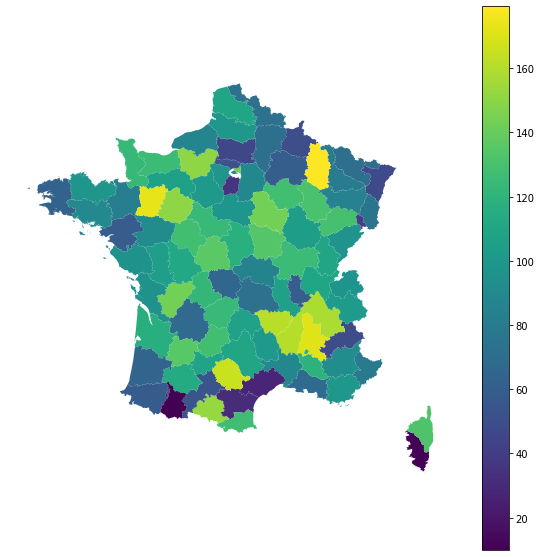

In [10]:
# On teste la carte avec le temps d'attente pour un dentiste
communes_att2['dep'] = communes.insee.str[:2]


fig,ax = plt.subplots(figsize=(10, 10))

communes_att2[communes_att2.dep != "97"].dissolve(by='dep', aggfunc='mean').plot(ax = ax, column = "Dentiste",legend=True)
ax.set_axis_off()
ax

### Visualisation avec le temps d'attente moyen (généralistes et spécialistes) par département

In [11]:
# On créé le dataframe avec temps d'attente moyen 

communes_att2['att_moyenne_2'] = communes_att2[['Dentiste', 'Dermatologue','Généraliste','Gynécologue','Ophtalmologue','Pédiatre']].mean(axis=1)


<AxesSubplot:>

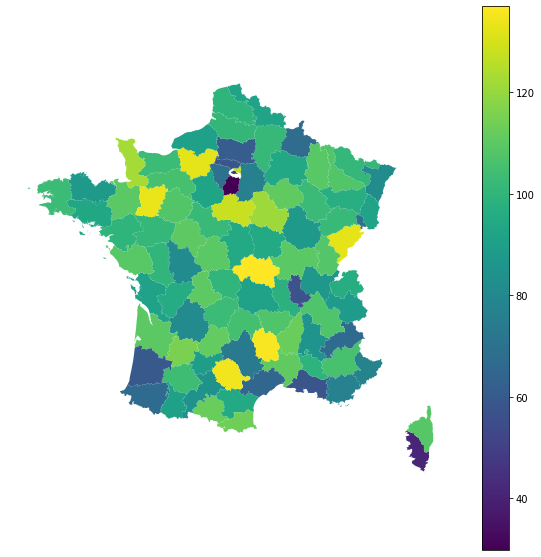

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))

communes_att2[communes_att2.dep != "97"].dissolve(by='dep', aggfunc='mean').plot(ax = ax, column = "att_moyenne_2",legend=True)
ax.set_axis_off()
ax

Observation et conclusion: il ne semble pas que le temps d'attente soit réellement déterminé géographiquement. Cependant, les choses suivantes sont à noter. Comme prévu, le bassin parisien est bien desservi. On ne peut pas vraiment noter une fracture nord-sud, cependant les littoraux (sud-est par exemple) semblent disposer de temps d'attente plus faibles que le centre de la France.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f812232-8ed1-4e89-8f48-597e10058637' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>